In [1]:
#importing dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading data from city_day.csv taken from kaggle from 01-01-2015 to 31-12-2024 of various Indian Cities
df = pd.read_csv("India_Cities_AQI_Weather_2015_2024_Combined.csv")

In [3]:
df.head()

,Date,City,State,AQI,AQI_Category,PM2.5,PM10,NO2,SO2,CO,...,Min_Temperature_C,Avg_Temperature_C,Humidity_Percent,Rainfall_mm,Wind_Speed_kmh,Wind_Direction,Atmospheric_Pressure_hPa,Visibility_km,Month,Season
0,2015-01-01,Delhi,Delhi,282,Poor,121,180,86,63,5.75,...,-6.0,-1.5,76.4,0.0,11.1,N,1010.55,14.9,1,Winter
1,2015-01-02,Delhi,Delhi,210,Poor,85,139,59,45,4.10,...,-8.8,-3.1,48.9,0.0,9.2,S,1015.14,14.5,1,Winter
2,2015-01-03,Delhi,Delhi,257,Poor,107,168,72,59,5.54,...,-4.5,-0.3,53.7,0.0,7.1,NE,1017.66,14.2,1,Winter
3,2015-01-04,Delhi,Delhi,193,Moderate,88,126,48,36,3.58,...,-7.3,-0.6,76.7,0.0,10.4,NW,1009.99,15.0,1,Winter
4,2015-01-05,Delhi,Delhi,274,Poor,124,145,83,53,4.85,...,-3.1,4.4,66.1,0.0,12.8,NE,1016.24,15.0,1,Winter


### Analysing data 

#### Understanding the Data and handling missing values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18265 entries, 0 to 18264
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      18265 non-null  object 
 1   City                      18265 non-null  object 
 2   State                     18265 non-null  object 
 3   AQI                       18265 non-null  int64  
 4   AQI_Category              18265 non-null  object 
 5   PM2.5                     18265 non-null  int64  
 6   PM10                      18265 non-null  int64  
 7   NO2                       18265 non-null  int64  
 8   SO2                       18265 non-null  int64  
 9   CO                        18265 non-null  float64
 10  O3                        18265 non-null  int64  
 11  NH3                       18265 non-null  int64  
 12  Max_Temperature_C         18265 non-null  float64
 13  Min_Temperature_C         18265 non-null  float64
 14  Avg_Te

In [5]:
df.shape

(18265, 23)

In [6]:
df.columns

Index(['Date', 'City', 'State', 'AQI', 'AQI_Category', 'PM2.5', 'PM10', 'NO2',
       'SO2', 'CO', 'O3', 'NH3', 'Max_Temperature_C', 'Min_Temperature_C',
       'Avg_Temperature_C', 'Humidity_Percent', 'Rainfall_mm',
       'Wind_Speed_kmh', 'Wind_Direction', 'Atmospheric_Pressure_hPa',
       'Visibility_km', 'Month', 'Season'],
      dtype='object')

In [7]:
df.describe()

,AQI,PM2.5,PM10,NO2,SO2,CO,O3,NH3,Max_Temperature_C,Min_Temperature_C,Avg_Temperature_C,Humidity_Percent,Rainfall_mm,Wind_Speed_kmh,Atmospheric_Pressure_hPa,Visibility_km,Month
count,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000
mean,117.620476,46.519244,70.035532,34.795292,22.990857,2.357313,40.670025,17.231371,25.974563,14.468119,20.221276,76.384216,1.266685,8.822502,1013.242090,9.774481,6.522310
std,50.482348,22.559589,33.684170,17.062194,11.242799,1.126961,21.112863,9.518506,9.786889,9.987360,9.836193,13.852881,5.116442,3.592870,10.039602,2.746346,3.448967
min,21.000000,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,-3.700000,-17.800000,-10.800000,30.000000,0.000000,0.000000,962.360000,0.500000,1.000000
25%,81.000000,30.000000,46.000000,23.000000,15.000000,1.570000,26.000000,10.000000,18.800000,7.100000,13.000000,66.600000,0.000000,6.300000,1006.500000,7.900000,4.000000
50%,107.000000,43.000000,65.000000,33.000000,21.000000,2.200000,38.000000,16.000000,26.100000,14.700000,20.300000,76.700000,0.000000,8.800000,1013.210000,9.800000,7.000000
75%,143.000000,59.000000,89.000000,44.000000,29.000000,2.980000,53.000000,23.000000,33.500000,22.100000,27.800000,86.700000,0.000000,11.200000,1020.090000,11.800000,10.000000
max,371.000000,167.000000,242.000000,118.000000,77.000000,8.960000,142.000000,65.000000,52.100000,43.100000,47.600000,100.000000,134.400000,23.200000,1055.000000,15.000000,12.000000


In [8]:
#converting date column into datetime object
df["Date"]=pd.to_datetime(df["Date"])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18265 entries, 0 to 18264
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      18265 non-null  datetime64[ns]
 1   City                      18265 non-null  object        
 2   State                     18265 non-null  object        
 3   AQI                       18265 non-null  int64         
 4   AQI_Category              18265 non-null  object        
 5   PM2.5                     18265 non-null  int64         
 6   PM10                      18265 non-null  int64         
 7   NO2                       18265 non-null  int64         
 8   SO2                       18265 non-null  int64         
 9   CO                        18265 non-null  float64       
 10  O3                        18265 non-null  int64         
 11  NH3                       18265 non-null  int64         
 12  Max_Temperature_C 

In [11]:
#diving group based on city names
group_df = df.groupby("City")

#making city wise dataframe
bengaluru_df = group_df.get_group("Bengaluru")

In [12]:
bengaluru_df

,Date,City,State,AQI,AQI_Category,PM2.5,PM10,NO2,SO2,CO,...,Min_Temperature_C,Avg_Temperature_C,Humidity_Percent,Rainfall_mm,Wind_Speed_kmh,Wind_Direction,Atmospheric_Pressure_hPa,Visibility_km,Month,Season
14612,2015-01-01,Bengaluru,Karnataka,106,Moderate,49,50,30,22,2.05,...,7.9,11.9,59.0,0.0,6.1,NW,1012.11,11.2,1,Winter
14613,2015-01-02,Bengaluru,Karnataka,109,Moderate,28,78,33,16,2.18,...,-2.0,5.2,63.4,0.0,7.5,SW,1011.37,10.6,1,Winter
14614,2015-01-03,Bengaluru,Karnataka,101,Moderate,32,70,38,12,2.09,...,3.7,8.7,50.9,0.0,12.7,NE,1021.15,15.0,1,Winter
14615,2015-01-04,Bengaluru,Karnataka,73,Satisfactory,10,47,19,16,1.71,...,1.6,6.5,49.1,0.0,8.4,SE,1025.14,9.2,1,Winter
14616,2015-01-05,Bengaluru,Karnataka,66,Satisfactory,26,19,13,15,1.28,...,-3.4,1.9,51.2,0.0,12.8,W,1019.24,13.5,1,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18260,2024-12-27,Bengaluru,Karnataka,104,Moderate,49,71,10,13,2.82,...,3.8,8.2,58.8,0.0,7.9,E,1012.03,12.1,12,Winter
18261,2024-12-28,Bengaluru,Karnataka,138,Moderate,45,54,51,27,2.21,...,8.4,12.4,57.6,0.0,5.9,NE,1021.34,11.2,12,Winter
18262,2024-12-29,Bengaluru,Karnataka,97,Satisfactory,25,57,35,19,1.75,...,-2.0,5.4,59.7,0.0,10.5,NE,1034.01,10.9,12,Winter
18263,2024-12-30,Bengaluru,Karnataka,79,Satisfactory,21,22,13,15,1.81,...,5.6,12.6,52.2,0.0,7.7,SE,1014.33,14.7,12,Winter


In [13]:
#reseting indices
bengaluru_df = bengaluru_df.reset_index(drop=True)

In [14]:
bengaluru_df

,Date,City,State,AQI,AQI_Category,PM2.5,PM10,NO2,SO2,CO,...,Min_Temperature_C,Avg_Temperature_C,Humidity_Percent,Rainfall_mm,Wind_Speed_kmh,Wind_Direction,Atmospheric_Pressure_hPa,Visibility_km,Month,Season
0,2015-01-01,Bengaluru,Karnataka,106,Moderate,49,50,30,22,2.05,...,7.9,11.9,59.0,0.0,6.1,NW,1012.11,11.2,1,Winter
1,2015-01-02,Bengaluru,Karnataka,109,Moderate,28,78,33,16,2.18,...,-2.0,5.2,63.4,0.0,7.5,SW,1011.37,10.6,1,Winter
2,2015-01-03,Bengaluru,Karnataka,101,Moderate,32,70,38,12,2.09,...,3.7,8.7,50.9,0.0,12.7,NE,1021.15,15.0,1,Winter
3,2015-01-04,Bengaluru,Karnataka,73,Satisfactory,10,47,19,16,1.71,...,1.6,6.5,49.1,0.0,8.4,SE,1025.14,9.2,1,Winter
4,2015-01-05,Bengaluru,Karnataka,66,Satisfactory,26,19,13,15,1.28,...,-3.4,1.9,51.2,0.0,12.8,W,1019.24,13.5,1,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3648,2024-12-27,Bengaluru,Karnataka,104,Moderate,49,71,10,13,2.82,...,3.8,8.2,58.8,0.0,7.9,E,1012.03,12.1,12,Winter
3649,2024-12-28,Bengaluru,Karnataka,138,Moderate,45,54,51,27,2.21,...,8.4,12.4,57.6,0.0,5.9,NE,1021.34,11.2,12,Winter
3650,2024-12-29,Bengaluru,Karnataka,97,Satisfactory,25,57,35,19,1.75,...,-2.0,5.4,59.7,0.0,10.5,NE,1034.01,10.9,12,Winter
3651,2024-12-30,Bengaluru,Karnataka,79,Satisfactory,21,22,13,15,1.81,...,5.6,12.6,52.2,0.0,7.7,SE,1014.33,14.7,12,Winter


### Forecasting using FB Prophet

In [15]:
bengaluru_df

,Date,City,State,AQI,AQI_Category,PM2.5,PM10,NO2,SO2,CO,...,Min_Temperature_C,Avg_Temperature_C,Humidity_Percent,Rainfall_mm,Wind_Speed_kmh,Wind_Direction,Atmospheric_Pressure_hPa,Visibility_km,Month,Season
0,2015-01-01,Bengaluru,Karnataka,106,Moderate,49,50,30,22,2.05,...,7.9,11.9,59.0,0.0,6.1,NW,1012.11,11.2,1,Winter
1,2015-01-02,Bengaluru,Karnataka,109,Moderate,28,78,33,16,2.18,...,-2.0,5.2,63.4,0.0,7.5,SW,1011.37,10.6,1,Winter
2,2015-01-03,Bengaluru,Karnataka,101,Moderate,32,70,38,12,2.09,...,3.7,8.7,50.9,0.0,12.7,NE,1021.15,15.0,1,Winter
3,2015-01-04,Bengaluru,Karnataka,73,Satisfactory,10,47,19,16,1.71,...,1.6,6.5,49.1,0.0,8.4,SE,1025.14,9.2,1,Winter
4,2015-01-05,Bengaluru,Karnataka,66,Satisfactory,26,19,13,15,1.28,...,-3.4,1.9,51.2,0.0,12.8,W,1019.24,13.5,1,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3648,2024-12-27,Bengaluru,Karnataka,104,Moderate,49,71,10,13,2.82,...,3.8,8.2,58.8,0.0,7.9,E,1012.03,12.1,12,Winter
3649,2024-12-28,Bengaluru,Karnataka,138,Moderate,45,54,51,27,2.21,...,8.4,12.4,57.6,0.0,5.9,NE,1021.34,11.2,12,Winter
3650,2024-12-29,Bengaluru,Karnataka,97,Satisfactory,25,57,35,19,1.75,...,-2.0,5.4,59.7,0.0,10.5,NE,1034.01,10.9,12,Winter
3651,2024-12-30,Bengaluru,Karnataka,79,Satisfactory,21,22,13,15,1.81,...,5.6,12.6,52.2,0.0,7.7,SE,1014.33,14.7,12,Winter


In [16]:
bengaluru_df.columns

Index(['Date', 'City', 'State', 'AQI', 'AQI_Category', 'PM2.5', 'PM10', 'NO2',
       'SO2', 'CO', 'O3', 'NH3', 'Max_Temperature_C', 'Min_Temperature_C',
       'Avg_Temperature_C', 'Humidity_Percent', 'Rainfall_mm',
       'Wind_Speed_kmh', 'Wind_Direction', 'Atmospheric_Pressure_hPa',
       'Visibility_km', 'Month', 'Season'],
      dtype='object')

In [17]:
bengaluru_df.index

RangeIndex(start=0, stop=3653, step=1)

In [18]:
#splitting each pollutant
#pm2.5
bengaluru_pm25 = pd.DataFrame(bengaluru_df[["Date", "PM2.5"]])
bengaluru_pm25.columns = ["ds", "y"]

#pm10
bengaluru_pm10 = pd.DataFrame(bengaluru_df[["Date", "PM10"]])
bengaluru_pm10.columns = ["ds", "y"]

#NO2
bengaluru_no2 = pd.DataFrame(bengaluru_df[["Date", "NO2"]])
bengaluru_no2.columns = ["ds", "y"]

#NH3
bengaluru_nh3 = pd.DataFrame(bengaluru_df[["Date", "NH3"]])
bengaluru_nh3.columns = ["ds", "y"]

#CO
bengaluru_co = pd.DataFrame(bengaluru_df[["Date", "CO"]])
bengaluru_co.columns = ["ds", "y"]

#SO2
bengaluru_so2 = pd.DataFrame(bengaluru_df[["Date", "SO2"]])
bengaluru_so2.columns = ["ds", "y"]

#O3
bengaluru_o3 = pd.DataFrame(bengaluru_df[["Date", "O3"]])
bengaluru_o3.columns = ["ds", "y"]


In [19]:
bengaluru_pm25['ds']

0      2015-01-01
1      2015-01-02
2      2015-01-03
3      2015-01-04
4      2015-01-05
          ...    
3648   2024-12-27
3649   2024-12-28
3650   2024-12-29
3651   2024-12-30
3652   2024-12-31
Name: ds, Length: 3653, dtype: datetime64[ns]

In [20]:
from prophet import Prophet

In [21]:
#initialize prophet for each pollutant
model_pm25 = Prophet()
model_pm25.fit(bengaluru_pm25)

#future timestamps
future_pm25 = model_pm25.make_future_dataframe(periods=365)

#predictions
forecast_pm25 = model_pm25.predict(future_pm25)

#print results
print(forecast_pm25[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

11:27:20 - cmdstanpy - INFO - Chain [1] start processing
11:27:20 - cmdstanpy - INFO - Chain [1] done processing


             ds       yhat  yhat_lower  yhat_upper
4013 2025-12-27  36.030246   20.070803   52.930224
4014 2025-12-28  36.598074   20.809292   52.292828
4015 2025-12-29  40.189121   24.544215   55.394746
4016 2025-12-30  39.609756   24.813171   55.518499
4017 2025-12-31  39.751409   25.155492   54.463078


In [22]:
model_pm10 = Prophet()
model_pm10.fit(bengaluru_pm10)

#future timestamps
future_pm10 = model_pm10.make_future_dataframe(periods=365)

#predictions
forecast_pm10 = model_pm10.predict(future_pm10)

#print results
print(forecast_pm10[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

11:27:22 - cmdstanpy - INFO - Chain [1] start processing
11:27:22 - cmdstanpy - INFO - Chain [1] done processing


             ds       yhat  yhat_lower  yhat_upper
4013 2025-12-27  55.422208   32.610390   78.341908
4014 2025-12-28  55.539401   30.559615   77.924226
4015 2025-12-29  61.297584   38.444293   83.993215
4016 2025-12-30  59.339865   35.221032   81.845390
4017 2025-12-31  60.437328   35.711165   82.080973


In [23]:
#initialize prophet for each pollutant
model_no2 = Prophet()
model_no2.fit(bengaluru_no2)

#future timestamps
future_no2 = model_no2.make_future_dataframe(periods=365)

#predictions
forecast_no2 = model_no2.predict(future_no2)

#print results
print(forecast_no2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

11:27:23 - cmdstanpy - INFO - Chain [1] start processing
11:27:23 - cmdstanpy - INFO - Chain [1] done processing


             ds       yhat  yhat_lower  yhat_upper
4013 2025-12-27  26.814237   14.355782   38.599587
4014 2025-12-28  26.365284   14.340917   39.120646
4015 2025-12-29  30.294682   18.011340   41.630259
4016 2025-12-30  29.809866   17.721536   40.934596
4017 2025-12-31  29.173578   18.185354   41.614590


In [24]:
#initialize prophet for each pollutant
model_nh3 = Prophet()
model_nh3.fit(bengaluru_nh3)

#future timestamps
future_nh3 = model_nh3.make_future_dataframe(periods=365)

#predictions
forecast_nh3 = model_nh3.predict(future_nh3)

#print results
print(forecast_nh3[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

11:27:24 - cmdstanpy - INFO - Chain [1] start processing
11:27:25 - cmdstanpy - INFO - Chain [1] done processing


             ds       yhat  yhat_lower  yhat_upper
4013 2025-12-27  13.946618    6.758516   21.424603
4014 2025-12-28  14.164531    6.109007   22.204987
4015 2025-12-29  14.826798    7.739350   23.001143
4016 2025-12-30  14.810547    7.128464   22.606154
4017 2025-12-31  14.134888    6.292379   21.558521


In [25]:
#initialize prophet for each pollutant
model_co = Prophet()
model_co.fit(bengaluru_co)

#future timestamps
future_co = model_co.make_future_dataframe(periods=365)

#predictions
forecast_co = model_co.predict(future_co)

#print results
print(forecast_co[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

11:27:26 - cmdstanpy - INFO - Chain [1] start processing
11:27:26 - cmdstanpy - INFO - Chain [1] done processing


             ds      yhat  yhat_lower  yhat_upper
4013 2025-12-27  1.901654    1.145554    2.693130
4014 2025-12-28  1.950206    1.189007    2.721963
4015 2025-12-29  2.106754    1.332016    2.898496
4016 2025-12-30  2.133336    1.412259    2.921729
4017 2025-12-31  2.108397    1.309673    2.852365


In [26]:
#initialize prophet for each pollutant
model_so2 = Prophet()
model_so2.fit(bengaluru_so2)

#future timestamps
future_so2 = model_so2.make_future_dataframe(periods=365)

#predictions
forecast_so2 = model_so2.predict(future_so2)

#print results
print(forecast_so2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

11:27:27 - cmdstanpy - INFO - Chain [1] start processing
11:27:27 - cmdstanpy - INFO - Chain [1] done processing


             ds       yhat  yhat_lower  yhat_upper
4013 2025-12-27  18.726220   11.127705   26.187677
4014 2025-12-28  18.476943   10.890844   26.423593
4015 2025-12-29  20.862798   13.827162   28.253555
4016 2025-12-30  20.235543   12.487392   27.425032
4017 2025-12-31  20.699132   13.090238   27.472668


In [27]:
#initialize prophet for each pollutant
model_o3 = Prophet()
model_o3.fit(bengaluru_o3)

#future timestamps
future_o3 = model_o3.make_future_dataframe(periods=365)

#predictions
forecast_o3 = model_o3.predict(future_o3)

#print results
print(forecast_o3[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

11:27:28 - cmdstanpy - INFO - Chain [1] start processing
11:27:29 - cmdstanpy - INFO - Chain [1] done processing


             ds       yhat  yhat_lower  yhat_upper
4013 2025-12-27  30.940205   14.174230   47.165888
4014 2025-12-28  30.376431   13.162410   46.971912
4015 2025-12-29  33.767334   15.627363   51.006788
4016 2025-12-30  33.849626   17.606860   51.133802
4017 2025-12-31  34.661261   17.651305   51.068967


### Plotting the forecast and trend

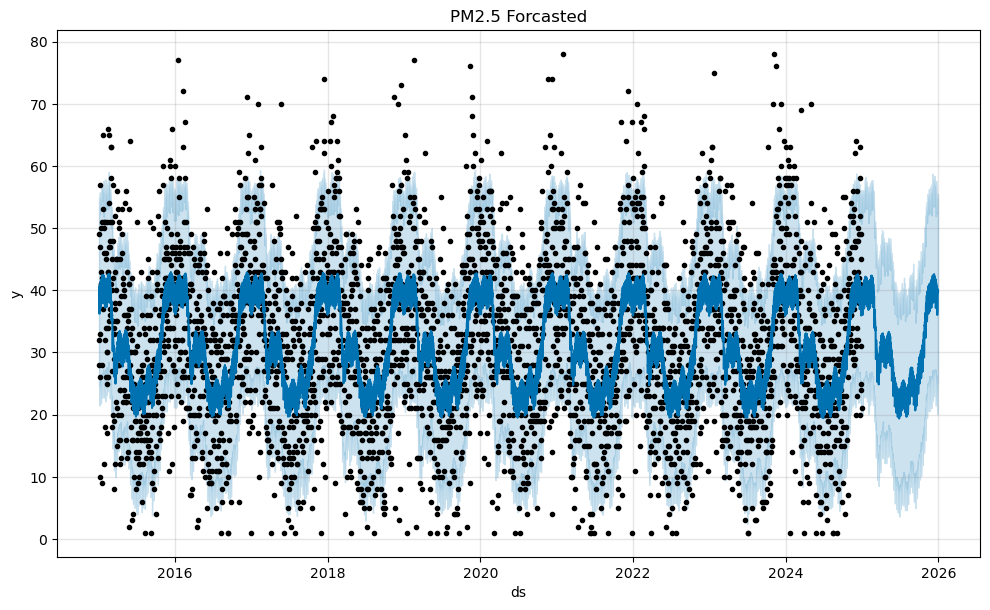

In [28]:
model_pm25.plot(forecast_pm25)
plt.title('PM2.5 Forcasted')
plt.show()

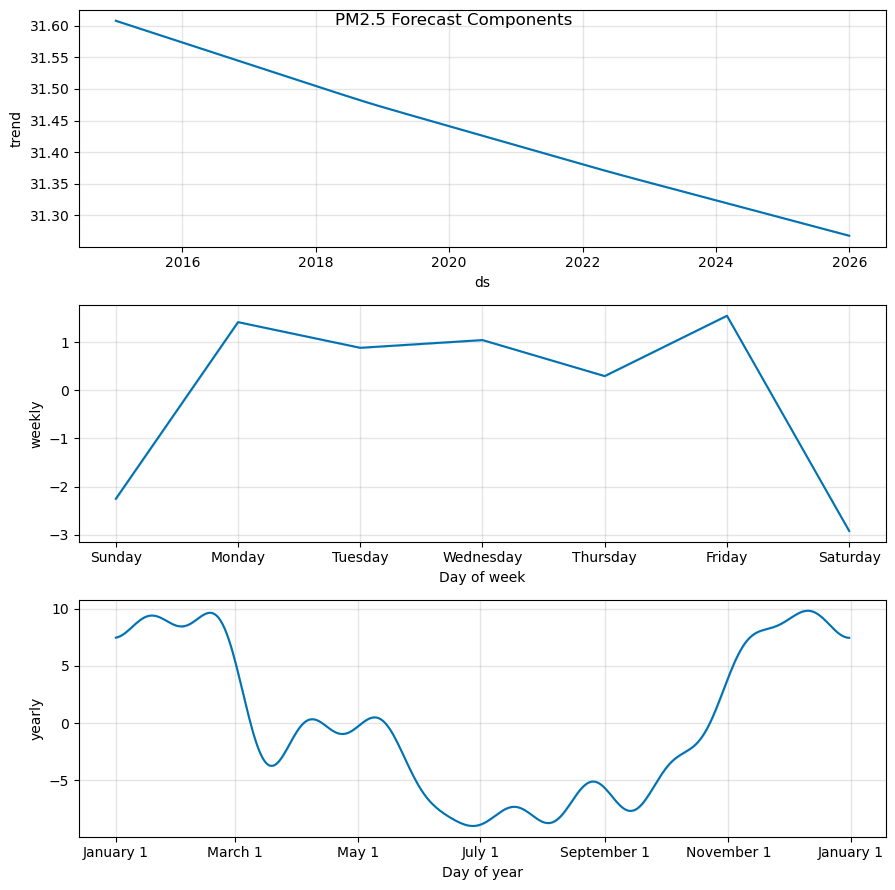

In [29]:
model_pm25.plot_components(forecast_pm25)
plt.suptitle('PM2.5 Forecast Components')
plt.show()

In [30]:
bengaluru_pm25.describe()

,ds,y
count,3653,3653.000000
mean,2020-01-01 00:00:00,31.441555
min,2015-01-01 00:00:00,1.000000
25%,2017-07-02 00:00:00,22.000000
50%,2020-01-01 00:00:00,31.000000
75%,2022-07-02 00:00:00,41.000000
max,2024-12-31 00:00:00,78.000000
std,NaN,13.772987


In [31]:
forecast_pm25['yhat'].describe()

count    4018.000000
mean       31.430458
std         6.832097
min        19.373279
25%        25.333773
50%        30.473946
75%        38.074088
max        42.928720
Name: yhat, dtype: float64

## Observation

Concentration of PM2.5 have been on a down trend since 2016 still on decrease, it is maximum on weekdays throughout the year, and it is minimum during monsoon(July-Sept)

Similar pattern can be seen with other pollutants.

## Correlation between Weather and AQI

In [32]:
bengaluru_df.columns

Index(['Date', 'City', 'State', 'AQI', 'AQI_Category', 'PM2.5', 'PM10', 'NO2',
       'SO2', 'CO', 'O3', 'NH3', 'Max_Temperature_C', 'Min_Temperature_C',
       'Avg_Temperature_C', 'Humidity_Percent', 'Rainfall_mm',
       'Wind_Speed_kmh', 'Wind_Direction', 'Atmospheric_Pressure_hPa',
       'Visibility_km', 'Month', 'Season'],
      dtype='object')

In [33]:
bengaluru_df[['AQI','Max_Temperature_C', 'Min_Temperature_C', 'Avg_Temperature_C', 'Humidity_Percent', 'Rainfall_mm', 'Wind_Speed_kmh', 'Atmospheric_Pressure_hPa', 'Visibility_km']].corr()

,AQI,Max_Temperature_C,Min_Temperature_C,Avg_Temperature_C,Humidity_Percent,Rainfall_mm,Wind_Speed_kmh,Atmospheric_Pressure_hPa,Visibility_km
AQI,1.000000,-0.518988,-0.502373,-0.514619,-0.315855,-0.092635,0.001804,0.013202,0.297094
Max_Temperature_C,-0.518988,1.000000,0.967598,0.991557,0.333779,0.090460,-0.006035,-0.019880,-0.609320
Min_Temperature_C,-0.502373,0.967598,1.000000,0.992149,0.319834,0.088115,-0.003976,-0.012062,-0.591199
Avg_Temperature_C,-0.514619,0.991557,0.992149,1.000000,0.329397,0.089993,-0.004993,-0.016037,-0.605113
Humidity_Percent,-0.315855,0.333779,0.319834,0.329397,1.000000,0.088434,-0.000579,-0.008004,-0.209831
Rainfall_mm,-0.092635,0.090460,0.088115,0.089993,0.088434,1.000000,0.001086,-0.039320,-0.066868
Wind_Speed_kmh,0.001804,-0.006035,-0.003976,-0.004993,-0.000579,0.001086,1.000000,0.025226,-0.009675
Atmospheric_Pressure_hPa,0.013202,-0.019880,-0.012062,-0.016037,-0.008004,-0.039320,0.025226,1.000000,0.027234
Visibility_km,0.297094,-0.609320,-0.591199,-0.605113,-0.209831,-0.066868,-0.009675,0.027234,1.000000


<Axes: >

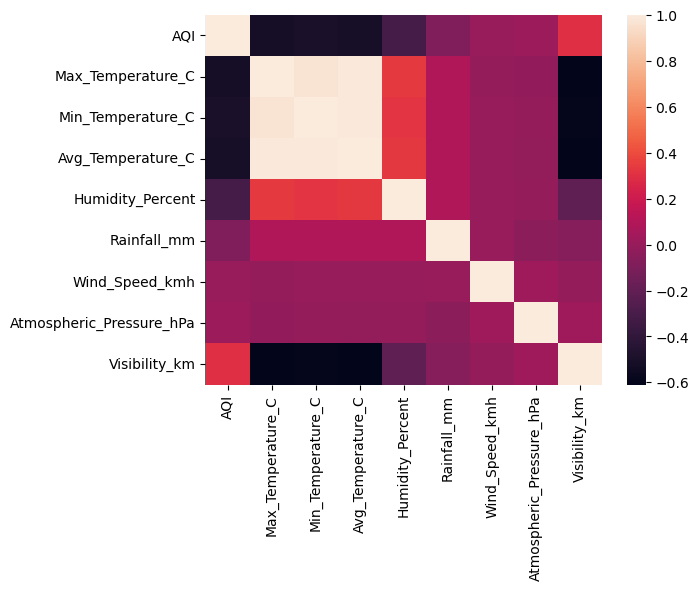

In [34]:
#visualising with heatmap
sns.heatmap(bengaluru_df[['AQI','Max_Temperature_C', 'Min_Temperature_C', 'Avg_Temperature_C', 'Humidity_Percent', 'Rainfall_mm', 'Wind_Speed_kmh', 'Atmospheric_Pressure_hPa', 'Visibility_km']].corr())

## Observation

AQI is highly affected by temparature, humidity and rainfall, but it is seen that it does not get much affected from wind speed and atmospheric pressure.

In [35]:
bengaluru_df['AQI'].describe()

count    3653.000000
mean       79.497947
std        23.435173
min        22.000000
25%        62.000000
50%        76.000000
75%        95.000000
max       183.000000
Name: AQI, dtype: float64

## Conclusion

Bengaluru, being a South-Indian city, experiences varied and good Air Quality throught the year due to various changes in concentration of pollutants due to seasonal and weather changes. In comparison to oter cities, it witness better air quality throught the year.